<a href="https://colab.research.google.com/github/afrah1994/Prediction-of-Housing-Prices/blob/master/Feature_importance_and_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initially in my dataset I had 6 input features and one output feature price. In the first phase of the project I decided to drop the input feature address because none of the address values were similar to each other. 

Now, In my dataset I have 5 input features and one output feature. In phase 1 of the project we drew a heat map and tried to find out the degree of relation between all the features. We had found that price and average area income have the most correlation followed by Average area house age , area population, average area number of rooms and average area number of bedrooms. Average area number of bedrooms had the least correlation with our output feature price. 

Now I will first train each input feature alone and predict the ouput feature price. This will give me the ranking of each input feature. Then I will iteratively remove input features starting from the lowest ranked and predict output feature price and compare results.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing_project.csv to USA_Housing_project (1).csv


In [0]:
import pandas as pd
data = pd.read_csv('USA_Housing_project.csv', delimiter=',')
data.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [0]:
import numpy as np
dataset = np.genfromtxt('USA_Housing_project.csv', delimiter=",", skip_header = True) 

In [0]:
np.random.shuffle(dataset)

# Using neural network feature ranking to do feature reduction

## Training with indivisual features as input

In [0]:
indiv=[]
for i in range(5):
  # Index for 30%
  index_30percent = int(0.3 * len(dataset[:, 0]))
  print(index_30percent)
  # Split into training and validation
  if i==0:
    XVALID5 = dataset[:index_30percent, [4]]
    YVALID5 = dataset[:index_30percent, 5]
    XTRAIN5 = dataset[index_30percent:, [4]]
    YTRAIN5 = dataset[index_30percent:, 5]
  elif i==1:
    XVALID5 = dataset[:index_30percent, [3]]
    YVALID5 = dataset[:index_30percent, 5]
    XTRAIN5 = dataset[index_30percent:, [3]]
    YTRAIN5 = dataset[index_30percent:, 5]
  elif i==2:
    XVALID5 = dataset[:index_30percent, [2]]
    YVALID5 = dataset[:index_30percent, 5]
    XTRAIN5 = dataset[index_30percent:, [2]]
    YTRAIN5 = dataset[index_30percent:, 5]
  elif i==3:
    XVALID5 = dataset[:index_30percent, [1]]
    YVALID5 = dataset[:index_30percent, 5]
    XTRAIN5 = dataset[index_30percent:, [1]]
    YTRAIN5 = dataset[index_30percent:, 5]
  elif i==4:
    XVALID5 = dataset[:index_30percent, [0]]
    YVALID5 = dataset[:index_30percent, 5]
    XTRAIN5 = dataset[index_30percent:, [0]]
    YTRAIN5 = dataset[index_30percent:, 5]        
  #print(XVALID)
  #Applying mean and std from xtrain to xvalid
  mean = XTRAIN5.mean(axis = 0)
  XTRAIN5 -= mean
  std = XTRAIN5.std(axis = 0)
  XTRAIN5 /= std

  XVALID5 -= mean
  XVALID5 /= std
  #YTRAIN5 = np.log(YTRAIN5)
  #YVALID5 = np.log(YVALID5)
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
  model5 = Sequential()
  model5.add(Dense(12,input_dim =1, activation='relu'))
  model5.add(Dense(8, activation='relu'))
  model5.add(Dense(1, activation='linear'))
  callback_a = ModelCheckpoint(filepath = 'fi.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)
  model5.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
  history = model5.fit(XTRAIN5, YTRAIN5, validation_data=(XVALID5, YVALID5), epochs=500, batch_size=100, callbacks = [callback_a, callback_b])
  model5.load_weights('fi.hdf5')
  P5 = model5.predict(XVALID5)
  #YVALID_exp=np.exp(YVALID5)
  #P5=np.exp(P5)
  MAE5 = abs(YVALID5 - P5)
  print(MAE5)
  indiv.append(MAE5.mean())
  print("M=",indiv)

Streaming output truncated to the last 5000 lines.
35/35 [==============================] - 0s 2ms/step - loss: 1235481.6250 - mae: 1235481.5000 - val_loss: 1223484.7500 - val_mae: 1223484.7500
Epoch 39/500
35/35 [==============================] - 0s 2ms/step - loss: 1235468.3750 - mae: 1235468.3750 - val_loss: 1223471.7500 - val_mae: 1223471.7500
Epoch 40/500
35/35 [==============================] - 0s 2ms/step - loss: 1235454.8750 - mae: 1235454.8750 - val_loss: 1223457.8750 - val_mae: 1223457.8750
Epoch 41/500
35/35 [==============================] - 0s 3ms/step - loss: 1235440.8750 - mae: 1235440.8750 - val_loss: 1223443.6250 - val_mae: 1223443.6250
Epoch 42/500
35/35 [==============================] - 0s 3ms/step - loss: 1235426.1250 - mae: 1235426.1250 - val_loss: 1223428.5000 - val_mae: 1223428.6250
Epoch 43/500
35/35 [==============================] - 0s 3ms/step - loss: 1235411.0000 - mae: 1235411.0000 - val_loss: 1223413.1250 - val_mae: 1223413.1250
Epoch 44/500
35/35 [======

##  Comparing mean MAE for indivisual input feature models 

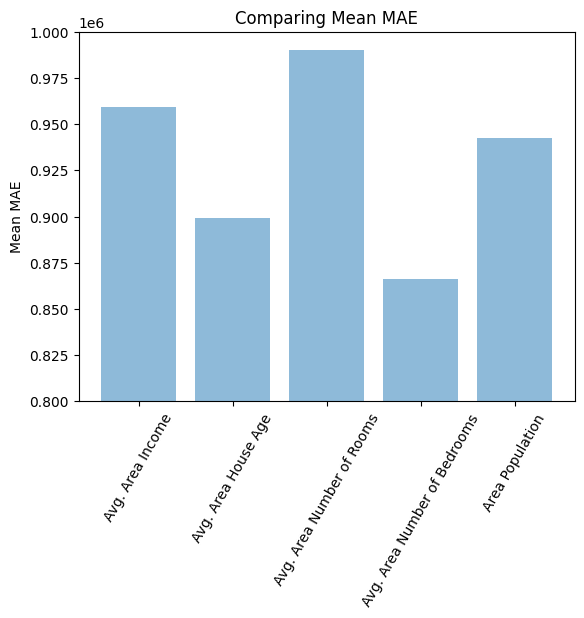

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population')
y_pos = np.arange(len(objects))
performance = [indiv[0],indiv[1],indiv[2],indiv[3],indiv[4]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=60)
plt.ylim(800000,1000000)
plt.ylabel('Mean MAE')
plt.title('Comparing Mean MAE')

plt.show()

Higher to lower ranking of input features:
	

Rank  | feature |Column number
--- | --- | ---
1 |Avg area number of bedrooms|3
2 |Avg are house age|1
3|Area Population|4
4|Avg area income|0
5 |Avg area number of rooms|2





## Training by removing least ranked individuals iteratively

In [0]:
iterative=[]
for i in range(4):
  # Index for 30%
  index_30percent = int(0.3 * len(dataset[:, 0]))
  print(index_30percent)
  # Split into training and validation
  if i==0:
    XVALID6 = dataset[:index_30percent, [0,1,2,3,4]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1,2,3,4]]
    YTRAIN6 = dataset[index_30percent:, 5]
  elif i==1:
    XVALID6 = dataset[:index_30percent, [0,1,3,4]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1,3,4]]
    YTRAIN6 = dataset[index_30percent:, 5] 
  elif i==2:
    XVALID6 = dataset[:index_30percent, [1,3,4]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [1,3,4]]
    YTRAIN6 = dataset[index_30percent:, 5]  
  elif i==3:
    XVALID6 = dataset[:index_30percent, [1,3]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [1,3]]
    YTRAIN6 = dataset[index_30percent:, 5]  
  #print(XVALID)
  #Applying mean and std from xtrain to xvalid
  mean = XTRAIN6.mean(axis = 0)
  XTRAIN6 -= mean
  std = XTRAIN6.std(axis = 0)
  XTRAIN6 /= std

  XVALID6 -= mean
  XVALID6 /= std
  #YTRAIN6 = np.log(YTRAIN6)
  #YVALID6 = np.log(YVALID6)
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
  model6 = Sequential()
  if i==0:
    model6.add(Dense(12,input_dim =5, activation='relu'))
  elif i==1:
     model6.add(Dense(12,input_dim =4, activation='relu')) 
  elif i==2:
    model6.add(Dense(12,input_dim =3, activation='relu'))  
  elif i==3:
    model6.add(Dense(12,input_dim =2, activation='relu'))   
  model6.add(Dense(8, activation='relu'))
  model6.add(Dense(1, activation='linear'))
  callback_a = ModelCheckpoint(filepath = 'fi.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)
  model6.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
  history = model6.fit(XTRAIN6, YTRAIN6, validation_data=(XVALID6, YVALID6), epochs=500, batch_size=100, callbacks = [callback_a, callback_b])
  model6.load_weights('fi.hdf5')
  P5 = model6.predict(XVALID6)
  #YVALID_exp=np.exp(YVALID6)
  #P5=np.exp(P5)
  MAE5 = abs(YVALID6 - P5)
  print(MAE5)
  iterative.append(MAE5.mean())
  print("M=",iterative)

1500
Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 1235669.3750 - mae: 1235669.3750 - val_loss: 1223678.5000 - val_mae: 1223678.5000
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 1235668.8750 - mae: 1235668.8750 - val_loss: 1223677.8750 - val_mae: 1223677.8750
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 1235668.2500 - mae: 1235668.2500 - val_loss: 1223677.0000 - val_mae: 1223677.1250
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 1235667.3750 - mae: 1235667.3750 - val_loss: 1223676.3750 - val_mae: 1223676.3750
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 1235666.3750 - mae: 1235666.3750 - val_loss: 1223675.2500 - val_mae: 1223675.2500
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 1235665.5000 - mae: 1235665.5000 - val_loss: 1223673.8750 - val_mae: 1223673.8750
Epoch 7/500
35/35 [==============================] - 0s 2ms/step 

## Comparing feature reduced model with original model

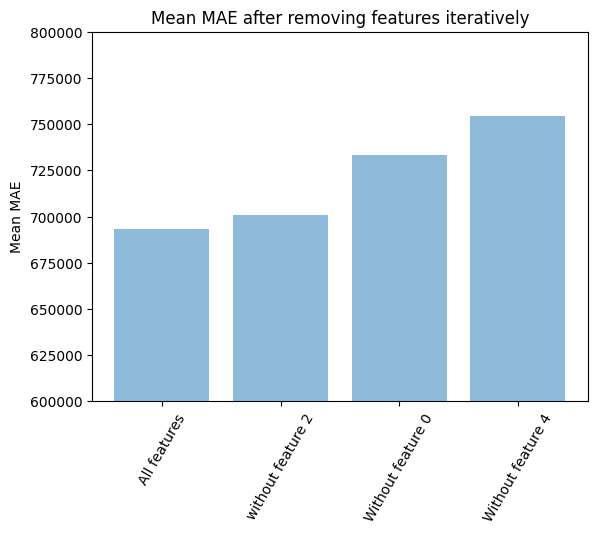

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects2 = ('All features',	'without feature 2',	'Without feature 0',	'Without feature 4')
y_pos2 = np.arange(len(objects2))
performance2 = [iterative[0],iterative[1],iterative[2],iterative[3]]

plt.bar(y_pos2, performance2, align='center', alpha=0.5)
plt.xticks(y_pos2, objects2)
plt.xticks(rotation=60)
plt.ylim(600000,800000)
plt.ylabel('Mean MAE')
plt.title('Mean MAE after removing features iteratively')

plt.show()

Column Numbers | Column features
--- | ---
0 |Avg. Area Income	
1 |Avg. Area House Age	
2 |Avg. Area Number of Rooms
3 |	Avg. Area Number of Bedrooms
4|	Area Population	



As we can observe our mean MAE keeps increasing as we keep dropping more features. We can use XGBoost to compare our findings. 

# Using XGBoost feature importance to do feature reduction

(https://drive.google.com/open?id=1x-zCdrUqnNZBdM3yRnaY4DDKOGOos42d)

According to XGBoost these are our feature importance rankings:

Ranking | column | column name
---|---|---
1|f1|Avg_Area_House_Age
2|f0|Avg_Area_Income
3|f2|Avg_Area_Number_of_Rooms
4|f4|Area_Population
5|f3|Avg_Area_Number_of_Bedrooms

In [0]:
xg=[]
for i in range(4):
  # Index for 30%
  index_30percent = int(0.3 * len(dataset[:, 0]))
  print(index_30percent)
  # Split into training and validation
  if i==0:
    XVALID6 = dataset[:index_30percent, [0,1,2,3,4]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1,2,3,4]]
    YTRAIN6 = dataset[index_30percent:, 5]
  elif i==1:
    XVALID6 = dataset[:index_30percent, [0,1,2,4]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1,2,4]]
    YTRAIN6 = dataset[index_30percent:, 5] 
  elif i==2:
    XVALID6 = dataset[:index_30percent, [0,1,2]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1,2]]
    YTRAIN6 = dataset[index_30percent:, 5]  
  elif i==3:
    XVALID6 = dataset[:index_30percent, [0,1]]
    YVALID6 = dataset[:index_30percent, 5]
    XTRAIN6 = dataset[index_30percent:, [0,1]]
    YTRAIN6 = dataset[index_30percent:, 5]  
  #print(XVALID)
  #Applying mean and std from xtrain to xvalid
  mean = XTRAIN6.mean(axis = 0)
  XTRAIN6 -= mean
  std = XTRAIN6.std(axis = 0)
  XTRAIN6 /= std

  XVALID6 -= mean
  XVALID6 /= std
  #YTRAIN6 = np.log(YTRAIN6)
  #YVALID6 = np.log(YVALID6)
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
  model6 = Sequential()
  if i==0:
    model6.add(Dense(12,input_dim =5, activation='relu'))
  elif i==1:
     model6.add(Dense(12,input_dim =4, activation='relu')) 
  elif i==2:
    model6.add(Dense(12,input_dim =3, activation='relu'))  
  elif i==3:
    model6.add(Dense(12,input_dim =2, activation='relu'))   
  model6.add(Dense(8, activation='relu'))
  model6.add(Dense(1, activation='linear'))
  callback_a = ModelCheckpoint(filepath = 'fi.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

  callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=40, verbose=0)
  model6.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
  history = model6.fit(XTRAIN6, YTRAIN6, validation_data=(XVALID6, YVALID6), epochs=500, batch_size=100, callbacks = [callback_a, callback_b])
  model6.load_weights('fi.hdf5')
  P5 = model6.predict(XVALID6)
  #YVALID_exp=np.exp(YVALID6)
  #P5=np.exp(P5)
  MAE5 = abs(YVALID6 - P5)
  print(MAE5)
  
  xg.append(MAE5.mean())
  print("M=",xg)

1500
Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 1235669.7500 - mae: 1235669.7500 - val_loss: 1223678.7500 - val_mae: 1223678.7500
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 1235669.1250 - mae: 1235669.1250 - val_loss: 1223678.0000 - val_mae: 1223678.0000
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 1235668.3750 - mae: 1235668.3750 - val_loss: 1223677.3750 - val_mae: 1223677.3750
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 1235667.6250 - mae: 1235667.6250 - val_loss: 1223676.3750 - val_mae: 1223676.3750
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 1235666.5000 - mae: 1235666.5000 - val_loss: 1223675.2500 - val_mae: 1223675.2500
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 1235665.6250 - mae: 1235665.6250 - val_loss: 1223674.0000 - val_mae: 1223673.8750
Epoch 7/500
35/35 [==============================] - 0s 3ms/step 

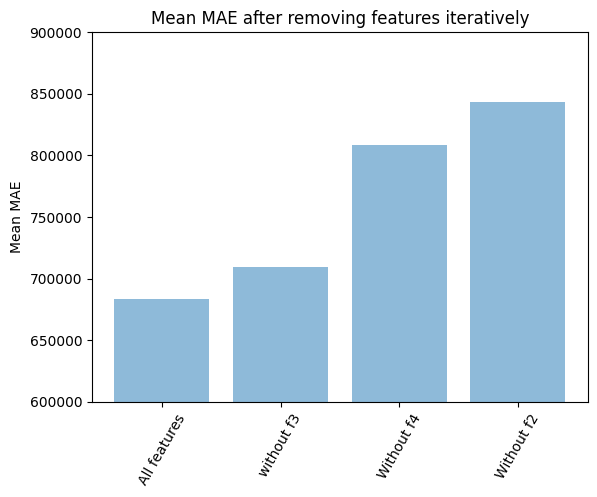

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects2 = ('All features',	'without f3',	'Without f4',	'Without f2')
y_pos2 = np.arange(len(objects2))
performance2 = [xg[0],xg[1],xg[2],xg[3]]

plt.bar(y_pos2, performance2, align='center', alpha=0.5)
plt.xticks(y_pos2, objects2)
plt.xticks(rotation=60)
plt.ylim(600000,900000)
plt.ylabel('Mean MAE')
plt.title('Mean MAE after removing features iteratively')

plt.show()
#print(M6,M7,M8,M9,M4)